## DATA SCIENCE PROJECT(GROUP 39) - Classifying a Country's Status ##

# 1. Introduction 
A country's status can be defined or classified as either developed or developing. This is determined by factors including life expectancy, percentage of spending, GDP, schooling, income composition of resources, and percentage of thinness. These specifically mentioned factors will be used in our analysis and code. The WHO data repository on the Life expectancy of various countries from 2000 to 2015 provides the data for our project. The goal of this research project is to select the best predictor variable from the available factors in order to utilize a classification model to forecast the status of countries. The model's accuracy will then be evaluated by contrasting its output with the original data.


## Libraries and Setting Seed ##

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
set.seed(1000)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## 2. Methods & Results ##


> ## Reading into R Tidying
>Code cell below does 2 things:
>1. Loads the data into R from the original web source 
>2. Tidies the data into the necessary format by converting Status, the categorical statistical variable, into a factor, removing all N/A observations, removing spaces from variable names, correcting variable naming errors and concatenating thinness.10.to.19.years and thinness.5.to.9.years into thinness.5.to.19.years.

In [2]:
#reading the dataset from the internet into R
url<-"https://raw.githubusercontent.com/Ansh-Sharma2/DataSciProject1/main/LifeExpectancyData%20(1).csv"
life_expectancy_data<-read_csv(url)

#changing the status variable to a factor datatype
life_expectancy_data<-mutate(life_expectancy_data,Status=as_factor(Status))

#counting the number of observations before and after the removal of the observations with N/A values 
intial_nrows<-nrow(life_expectancy_data)
life_expectancy_data<-na.omit(life_expectancy_data)
final_nrows<-nrow(life_expectancy_data)

#renaming all columns names that have a space and correcting an error in the naming of two of the column names respectfully
colnames(life_expectancy_data) <- make.names(colnames(life_expectancy_data))
life_expectancy_data<-rename(life_expectancy_data,thinness.10.to.19.years=thinness..1.19.years,thinness.5.to.9.years=thinness.5.9.years)

#determining the prevalence of thinness between 5 to 19 years by adding the prevalence of thinness between 5 to 9 years and 10 to 19 years
life_expectancy_data<-mutate(life_expectancy_data,thinness.5.to.19.years=thinness.10.to.19.years+thinness.5.to.9.years)

#outputing the first 6 observations in the dataset
head(life_expectancy_data,6)


Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness.10.to.19.years,thinness.5.to.9.years,Income.composition.of.resources,Schooling,thinness.5.to.19.years
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,34.5
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0,35.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9,35.4
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8,35.9
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5,36.4
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2,36.8


**Table#1:** Above table showing the first six observations of the life expectancy dataset.

>## Dataset Summary 
>Code cell below does 2 things:
>1. Splits the original dataset into the 75% training and 25% testing set to ensure an adequately sized training set capable of producing an accurate evaluation of a country’s status in the adequately sized testing set. 
>2. The number of deleted observations is also calculated by subtracting the number of observations before and after the N/A observations were removed.

In [3]:
#splitting the tidied dataset into the training and testing dataset
life_expectancy_split <- initial_split(life_expectancy_data,prop=0.75,strata=Status) 
    life_expectancy_train<-training(life_expectancy_split)
    life_expectancy_test<-testing(life_expectancy_split)

#calculating the number of observations that have been removed
num_rows_deleted<-intial_nrows-final_nrows
num_rows_deleted


[1] 1289

**Reasoning:** The above number tells us that 1289 observations had at least 1 cell with no recoreded data.

> Code cell below counts the number of instances of developed and developing countries and determines the proportion of these two classes.

In [4]:
#outputing the count of the number of instances for developed and developing countries as well as the proportion
status_proportions <- life_expectancy_train |>
                      group_by(Status) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(life_expectancy_train))
status_proportions

Status,n,percent
<fct>,<int>,<dbl>
Developing,1055,85.35599
Developed,181,14.64401


**Table#2:** Above table showing the number of developing and developed countries in the dataset.

**Reasoning:** The above table shows that the vast majority of countries in our dataset having a status of developing with developed countries being in the minority. This trait of the dataset may give potential bias to the model we create since there is so much data on what are developing country is compared to developed.

> Code cell below calculates the yearly averages, per country, of potentially useful predictors.

In [5]:
#grouping the data by country and calculating the averages of all the potentially useful predictors
mean_variables_train<-life_expectancy_train|>
    group_by(Country)|>
    summarize(avg_life_exp=mean(Life.expectancy),avg_GDP=mean(GDP),avg_percent_exp=mean(percentage.expenditure),avg_schooling_years=mean(Schooling),
              avg_income_comp=mean(Income.composition.of.resources),avg_thinness=mean(thinness.5.to.19.years))|>
    head(6) 
mean_variables_train

Country,avg_life_exp,avg_GDP,avg_percent_exp,avg_schooling_years,avg_income_comp,avg_thinness
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,57.67500,333.7495,32.68551,8.008333,0.4091667,33.608333
Albania,74.73636,1796.3760,159.99016,11.754545,0.7023636,3.418182
Algeria,74.43750,3926.5778,367.12891,13.487500,0.7140000,11.862500
Angola,51.48000,3250.8142,184.91124,9.720000,0.4996000,17.700000
Argentina,75.20000,7069.0828,883.74452,16.650000,0.7960000,1.990000
Armenia,73.33333,2084.4008,148.85372,11.822222,0.7014444,4.133333


**Table #3:** Above table showing the yearly averages of all the potentially useful predictors by the country for the first 6 observations

**Reasoning:** These averages allows us to compare how high or low a given variable for a given country's average is compared to other countries. This allows us to glimpse or spot potential trends in developed or developing countries as it is speculated that developing countries should, on average, have lower GDP, schooling years, percentage of GDP being used on healthcare, human development index but a higher prevalence of thinness with developed countries having inverse trends.

> ## Graphs and Visualizations ##
The following 6 code cells below generate the scatterplots for the respective variable combinations.

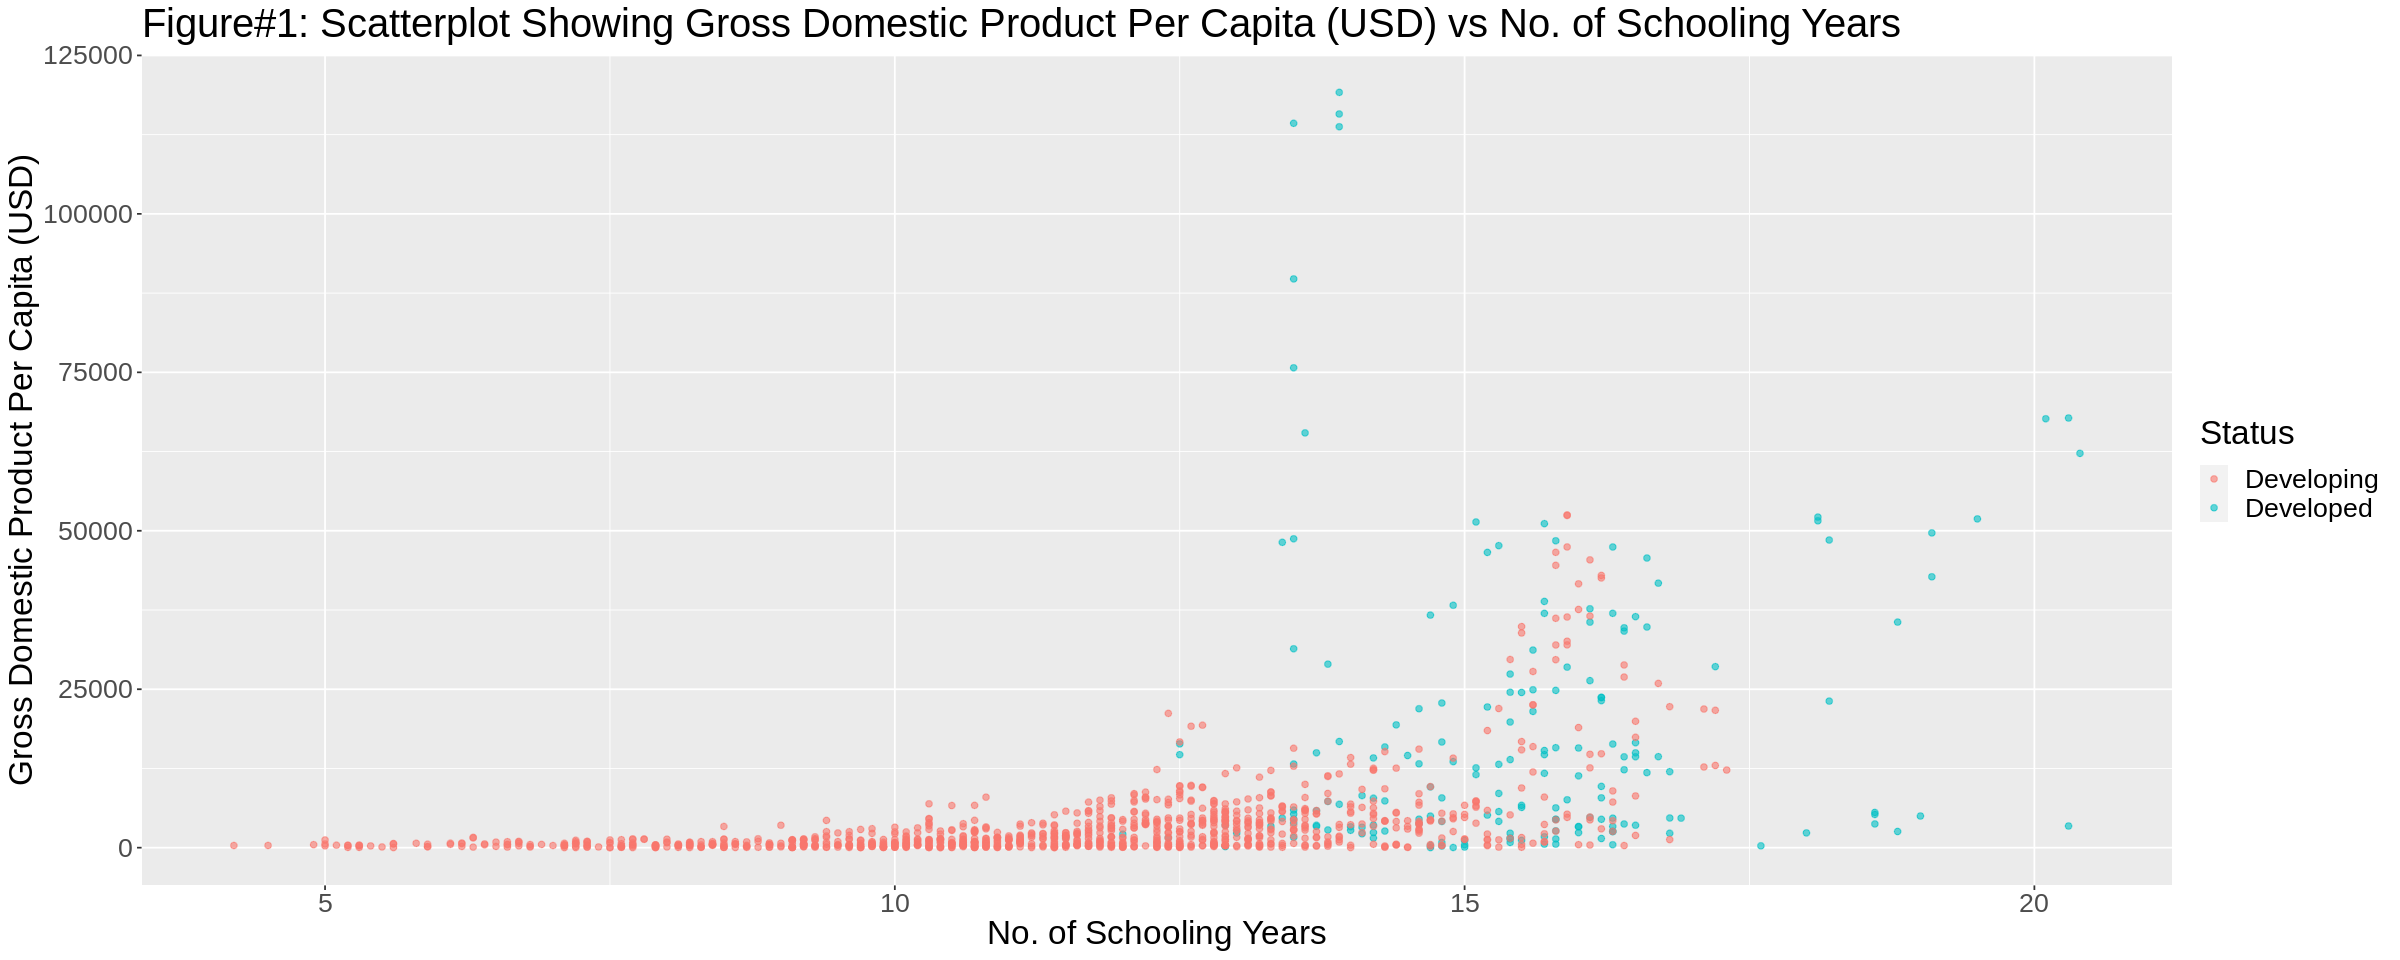

In [6]:
#setting the size of all plots
options(repr.plot.width = 20, repr.plot.height = 8)

#creating the scatterplot for Schooling and GPD variables 
Schooling_vs_GDP<-life_expectancy_train|>
    ggplot(aes(x=Schooling,y=GDP,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("No. of Schooling Years")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    ggtitle("Figure#1: Scatterplot Showing Gross Domestic Product Per Capita (USD) vs No. of Schooling Years")+
    theme(text = element_text(size = 20))  
Schooling_vs_GDP

Figure #1 shows a weak positive correlation between GDP and the number of schooling years; it can be inferred that developed countries tend to have students in school for a longer period resulting in an educated workforce that boost the country’s GDP.

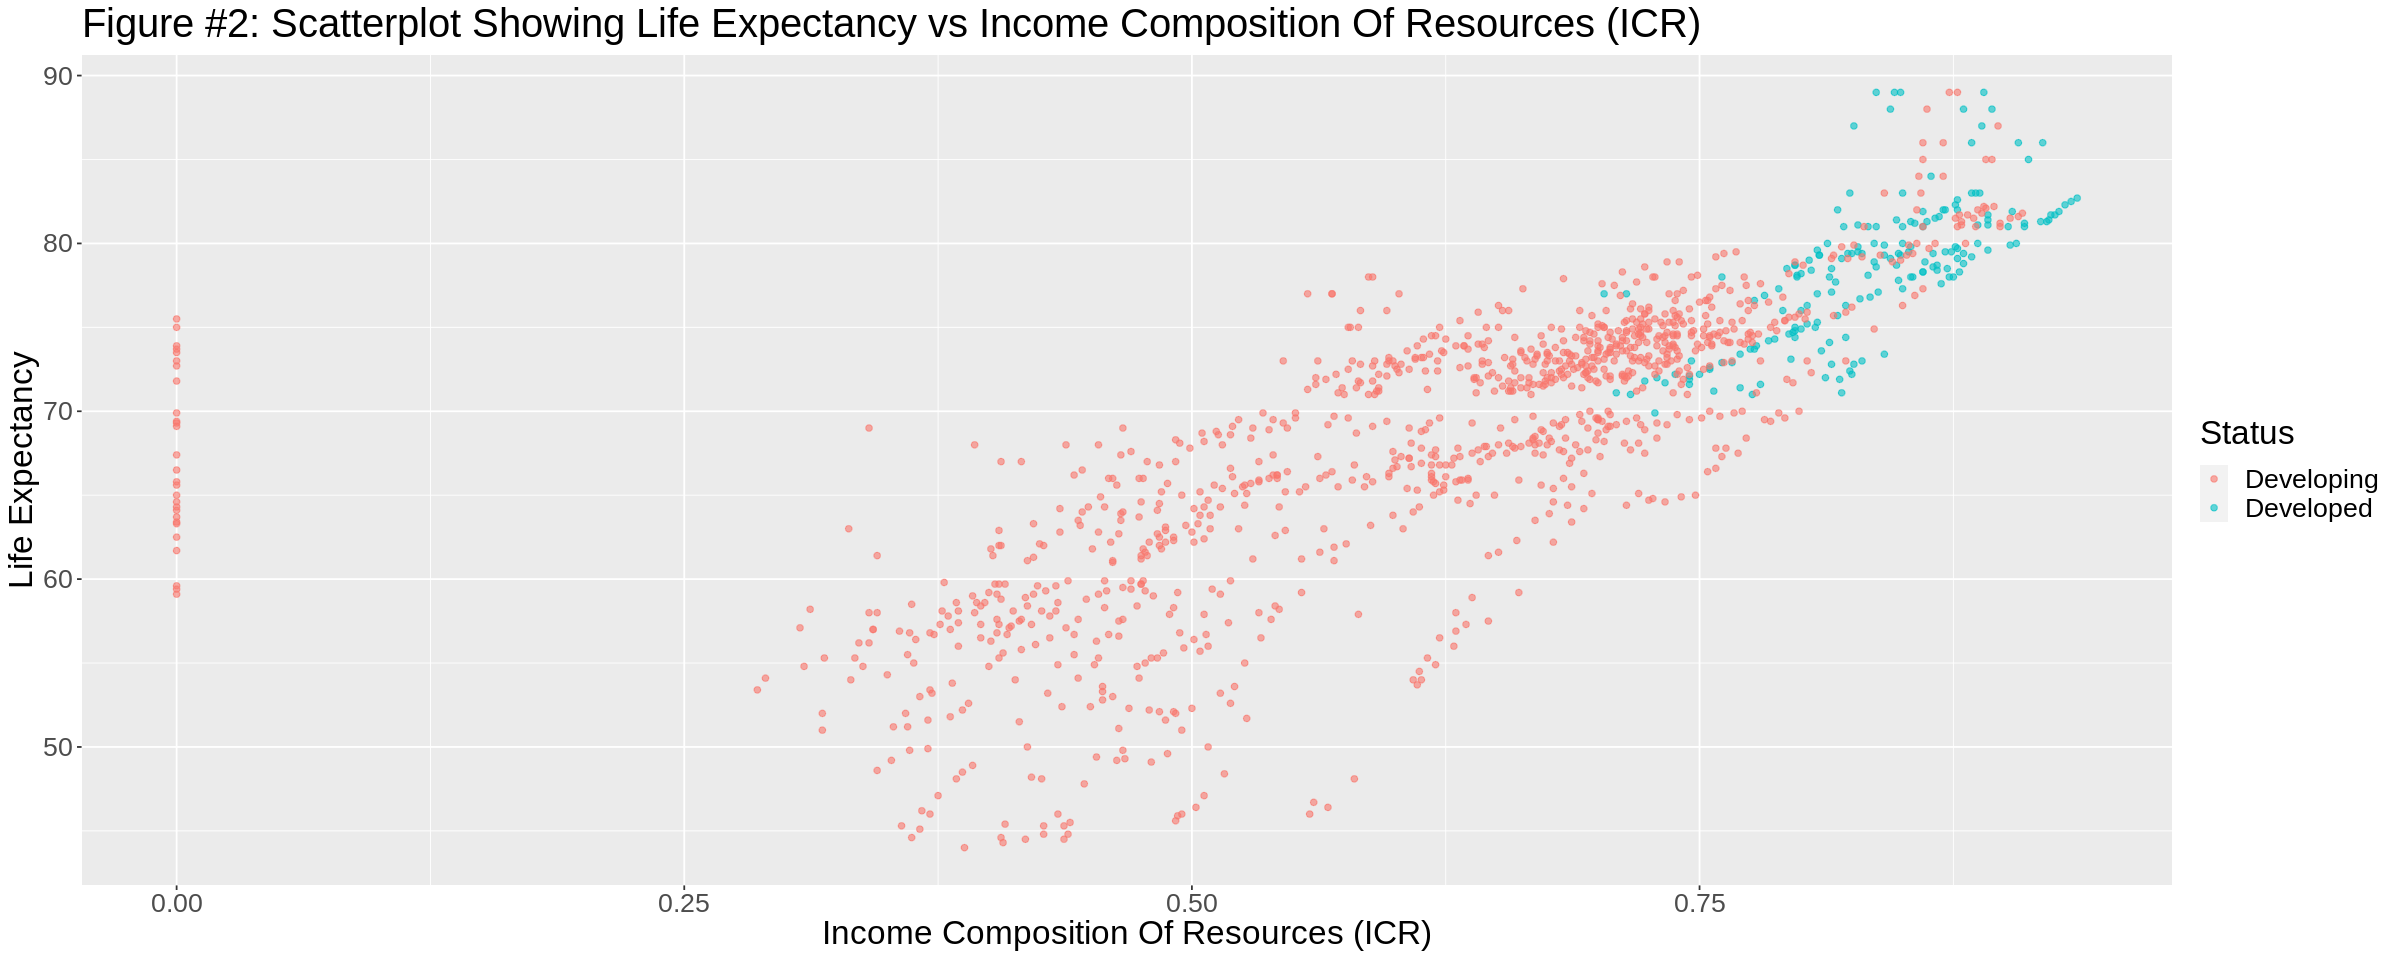

In [7]:
#creating the scatterplot for Income.composition.of.resources and Life.expectancy variables 
Life_exp_vs_income_comp<-life_expectancy_train|>
    ggplot(aes(x=Income.composition.of.resources,y=Life.expectancy,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Income Composition Of Resources (ICR)")+
    ylab("Life Expectancy")+
    ggtitle("Figure #2: Scatterplot Showing Life Expectancy vs Income Composition Of Resources (ICR)")+
    theme(text = element_text(size = 20))  
Life_exp_vs_income_comp

Figure #2 shows a strong positive correlation between life expectancy and ICR; it can be inferred that persons in developed countries are expected to life longer if the country has a higher ICR.

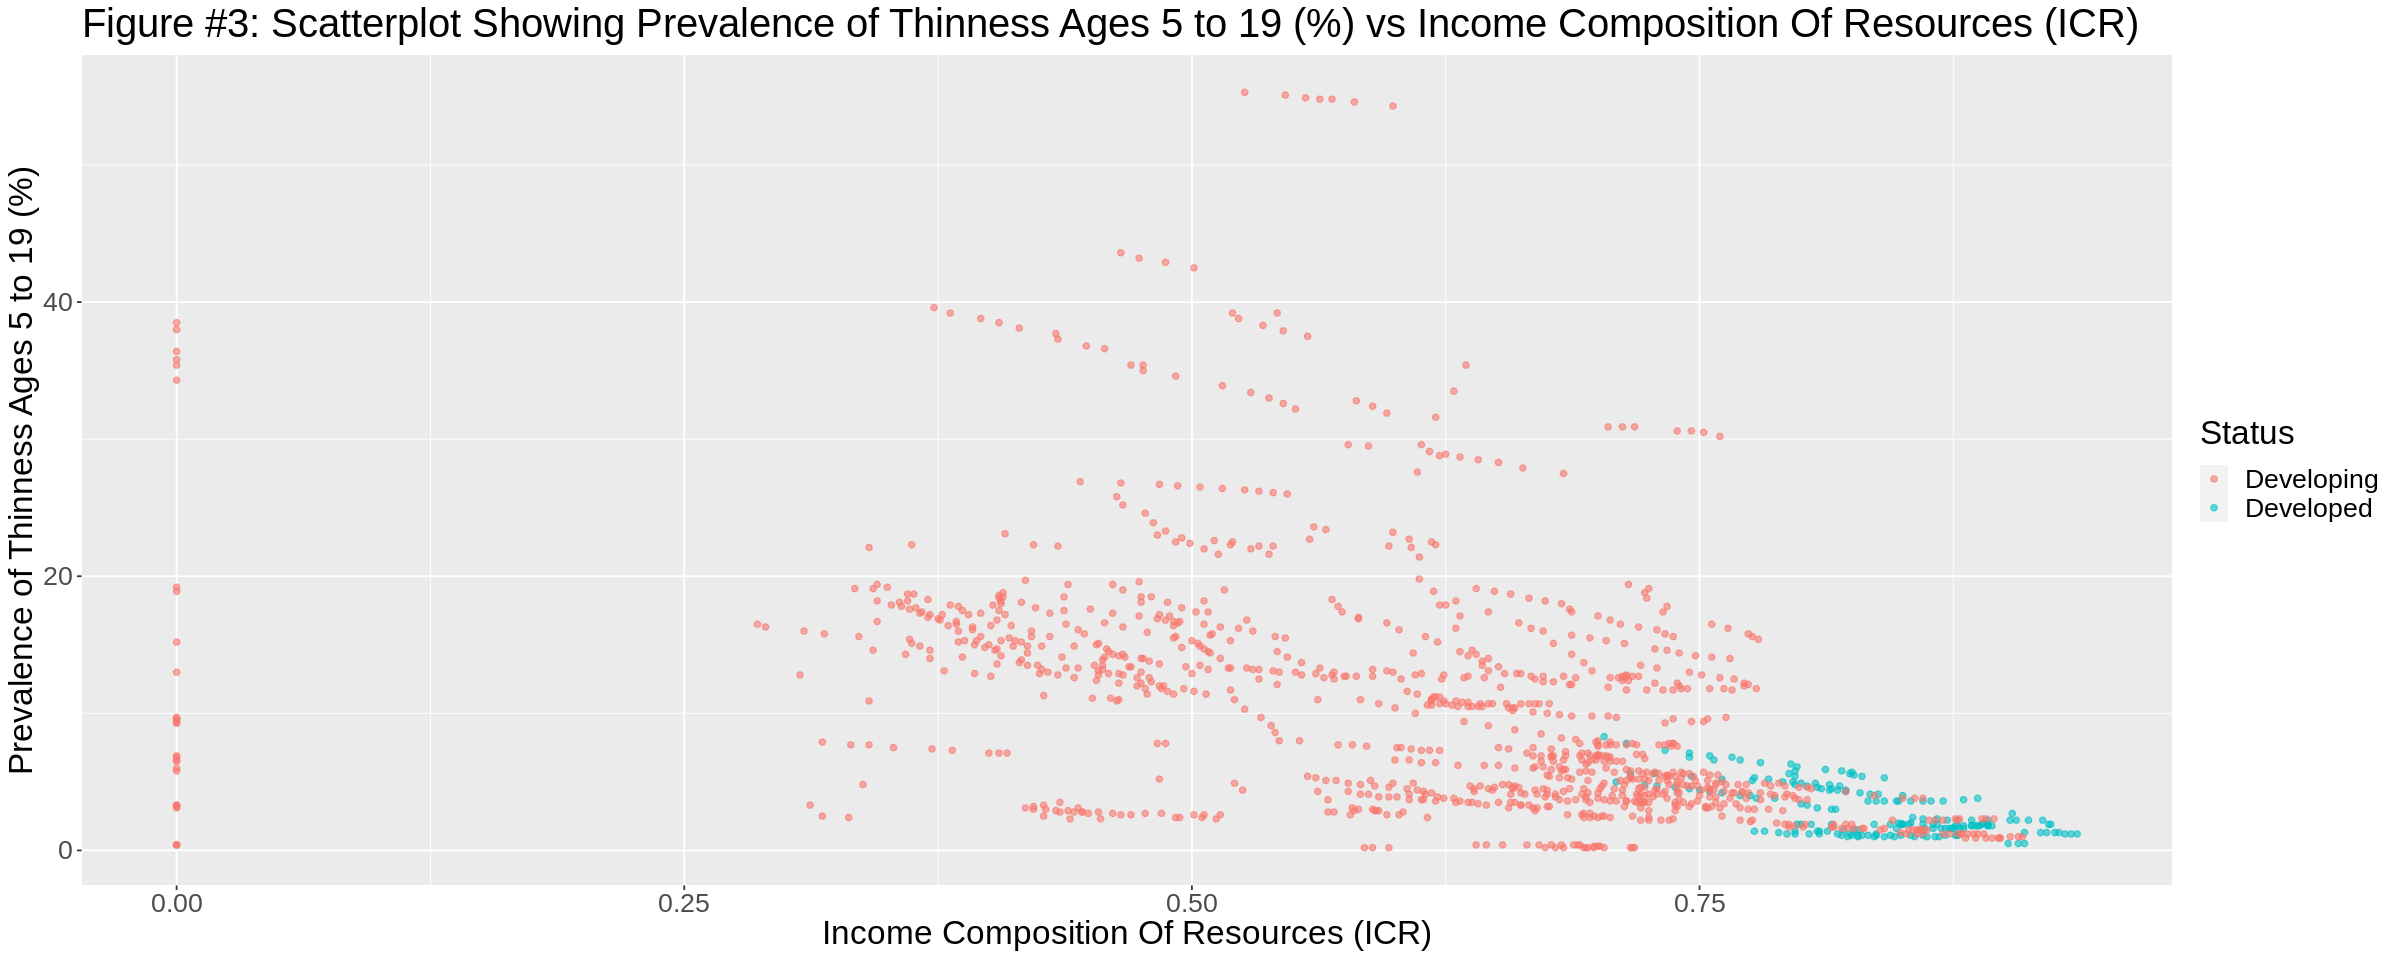

In [8]:
#creating the scatterplot for Thinness in children ages 5 to 19 and Income Composition of Resources variables 
thinness_vs_income_comp<-life_expectancy_train|>
    ggplot(aes(x=Income.composition.of.resources,y=thinness.5.to.19.years,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Income Composition Of Resources (ICR)")+
    ylab("Prevalence of Thinness Ages 5 to 19 (%)")+
    ggtitle("Figure #3: Scatterplot Showing Prevalence of Thinness Ages 5 to 19 (%) vs Income Composition Of Resources (ICR)")+
    theme(text = element_text(size = 20))  
thinness_vs_income_comp

Figure #3 shows a moderately strong positive correlation between the prevalence of thinness among children, ages 5 to 19, and ICR; it can be inferred that developed countries with a higher ICR have less prevalence of thinness among children.

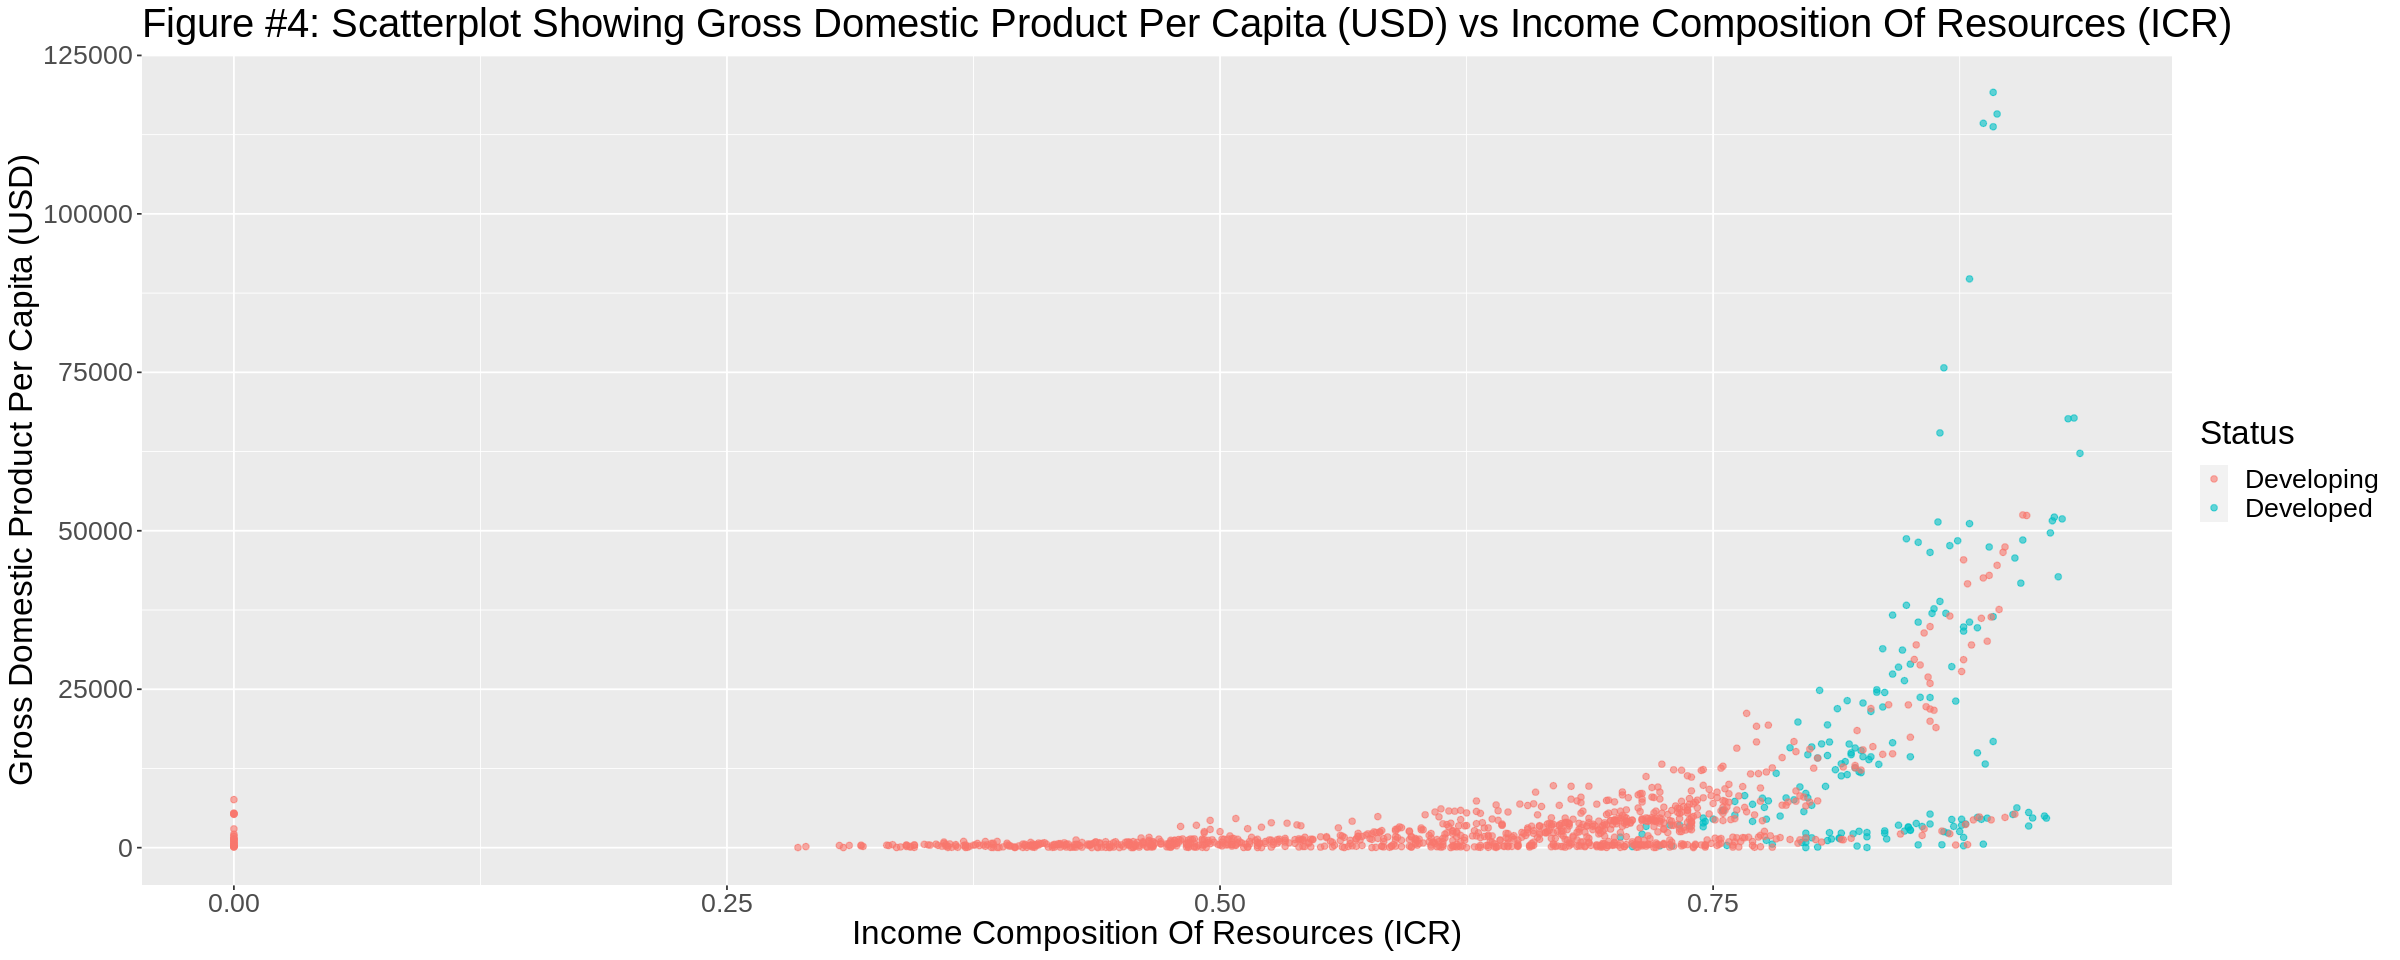

In [9]:
#creating the scatterplot for GDP and Income Composition of Resources variables 
GDP_vs_income_comp<-life_expectancy_train|>#relationship between GDP and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=GDP,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Income Composition Of Resources (ICR)")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    ggtitle("Figure #4: Scatterplot Showing Gross Domestic Product Per Capita (USD) vs Income Composition Of Resources (ICR)")+
    theme(text = element_text(size = 20))  
GDP_vs_income_comp

Figure #4 shows that there is a weak positive correlation between GDP and ICR; it can be inferred that developed countries have a higher ICR and GDP

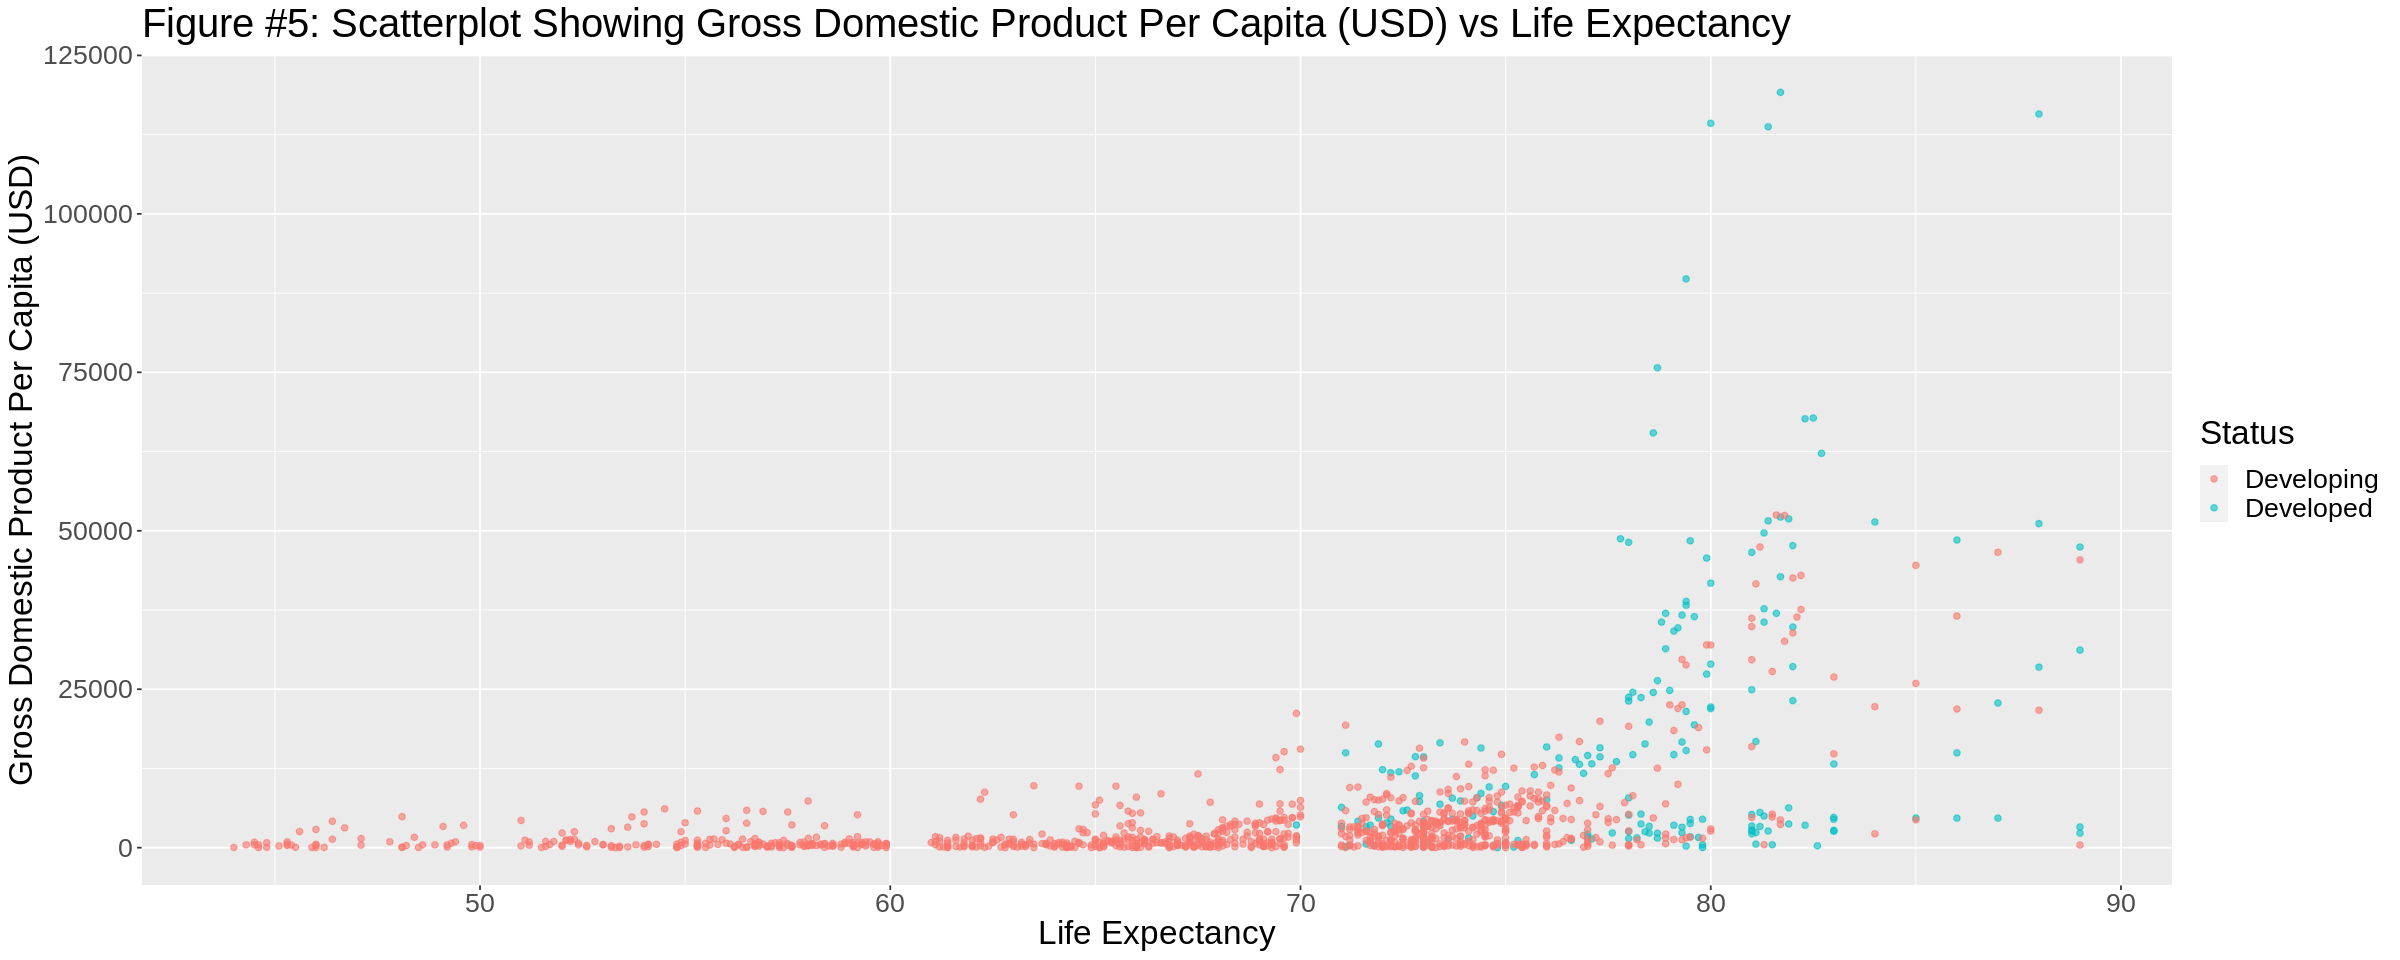

In [10]:
#creating the scatterplot for life Expectancy and GDP variables 
GDP_vs_Life<-life_expectancy_train|>
    ggplot(aes(x=Life.expectancy,y=GDP,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Life Expectancy")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    ggtitle("Figure #5: Scatterplot Showing Gross Domestic Product Per Capita (USD) vs Life Expectancy")+
    theme(text = element_text(size = 20))  
GDP_vs_Life

Figure #5 shows that there is a weak positive correlation between GDP and life expectance; it can be inferred that persons living in a developed country with a high GDP are expected to live longer.

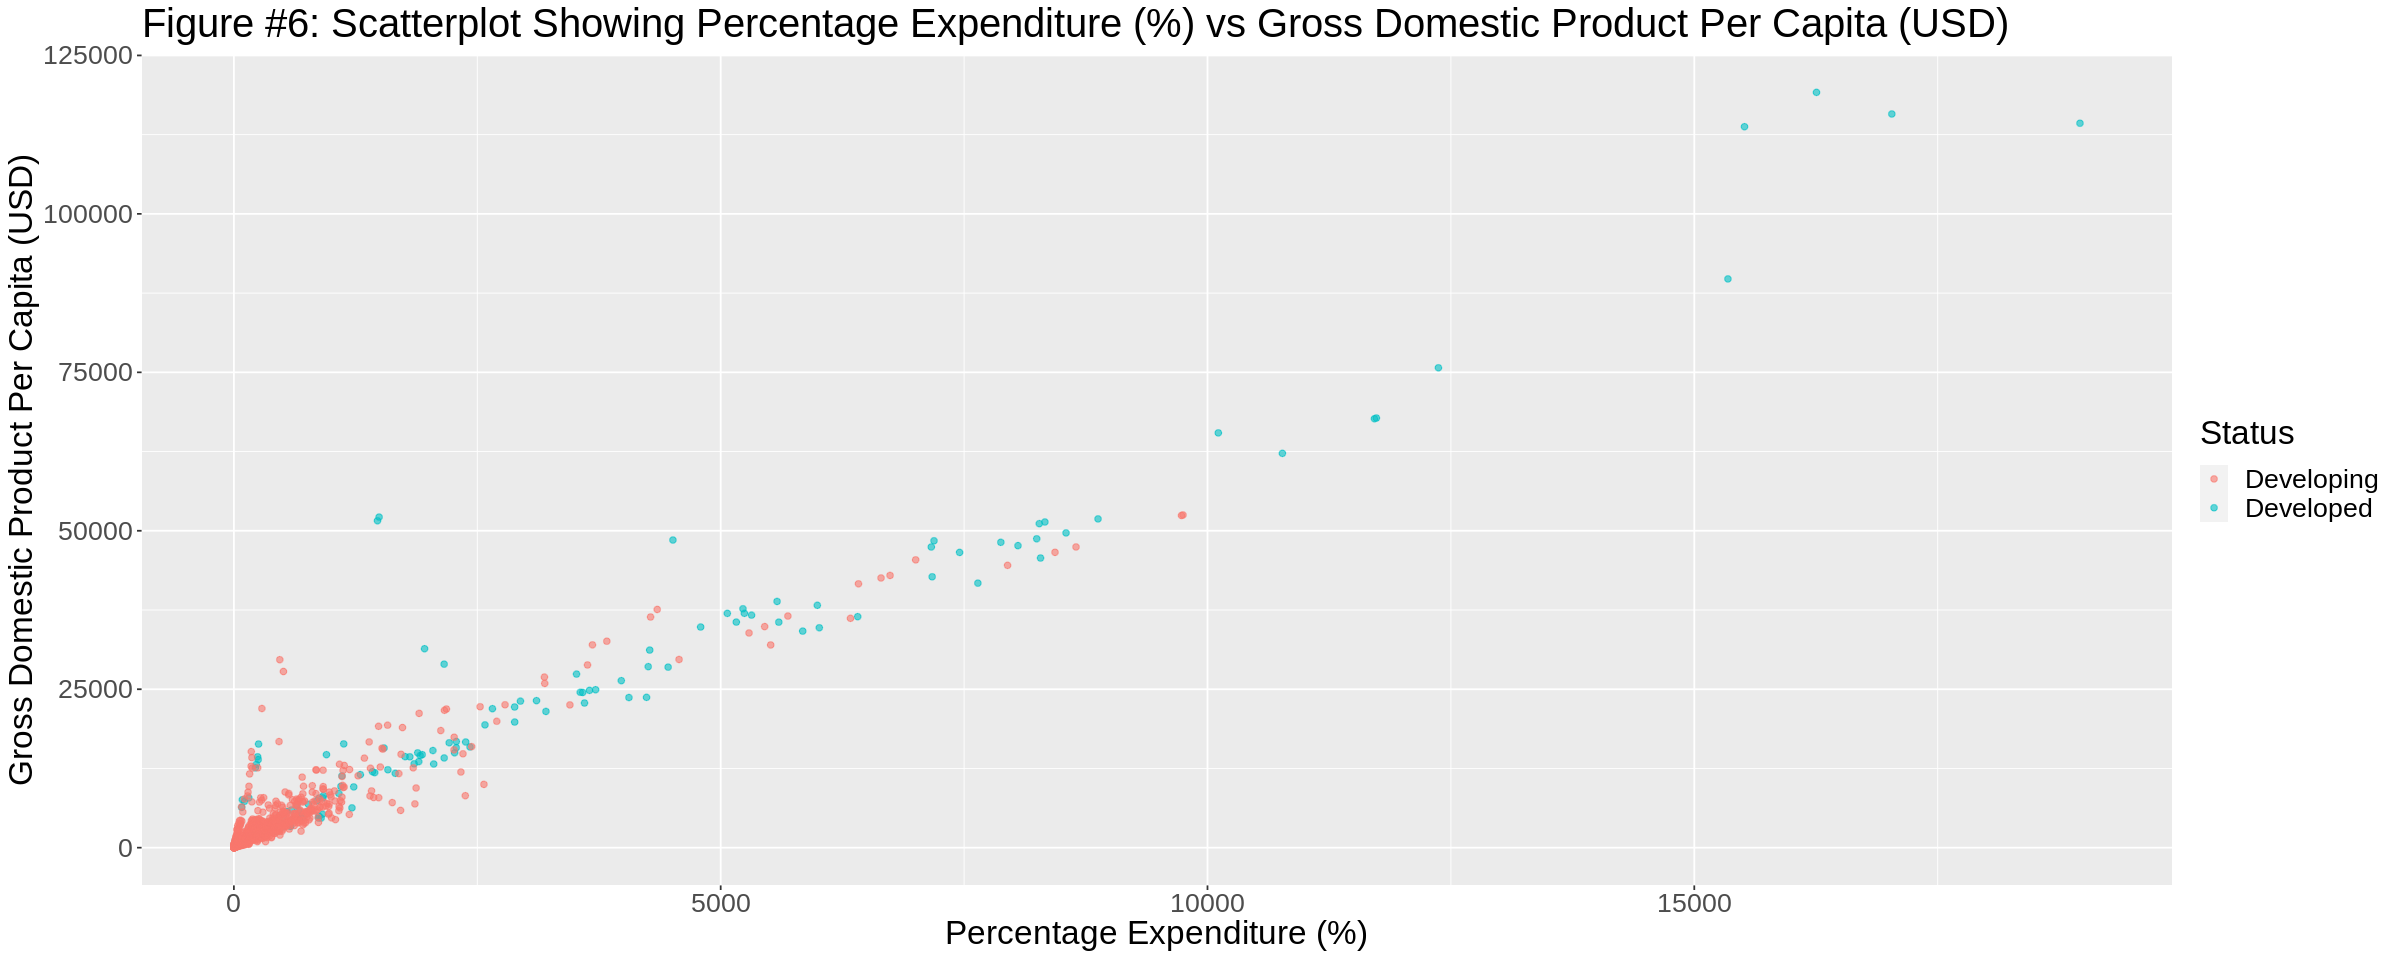

In [11]:
#creating the scatterplot for percentage expenditure and GDP variables 
GDP_vs_Expenditure<-life_expectancy_train|>
    ggplot(aes(x=percentage.expenditure,y=GDP,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Percentage Expenditure (%)")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    ggtitle("Figure #6: Scatterplot Showing Percentage Expenditure (%) vs Gross Domestic Product Per Capita (USD)")+
    theme(text = element_text(size = 20))  
GDP_vs_Expenditure

Figure #6 shows that there is a strong positive correlation between GPD and percentage expenditure; it can be inferred that developed countries have higher GPD allowing them to use more of it towards the health sector.

> Code cell below performs forward selection to determine the suspected accuracies of each subset of predictors. In doing so, the highest accuracy subset is determined. 

In [12]:
#selecting the potentially relevent predictors for Status
life_expectancy_subset<-select(life_expectancy_data, Status, GDP, Life.expectancy, Schooling, percentage.expenditure, 
                             Income.composition.of.resources,thinness.5.to.19.years)

#extracting the column names from the dataset except Status
names <- colnames(life_expectancy_subset |> select(-Status))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
life_vfold <- vfold_cv(life_expectancy_subset, v = 5, strata = Status)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Status", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        life_recipe <- recipe(as.formula(model_string), 
                                data = life_expectancy_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        k_vals <- tibble(neighbors = seq(from = 1, to = 10))
        acc <- workflow() |>
          add_recipe(life_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = life_vfold, grid = k_vals) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Status ~ Income.composition.of.resources,0.9023517
2,Status ~ Income.composition.of.resources+thinness.5.to.19.years,0.9430041
3,Status ~ Income.composition.of.resources+thinness.5.to.19.years+Life.expectancy,0.9793791
4,Status ~ Income.composition.of.resources+thinness.5.to.19.years+Life.expectancy+Schooling,0.9769768
5,Status ~ Income.composition.of.resources+thinness.5.to.19.years+Life.expectancy+Schooling+GDP,0.9612044
6,Status ~ Income.composition.of.resources+thinness.5.to.19.years+Life.expectancy+Schooling+GDP+percentage.expenditure,0.9618160


**Table #4:** Above table showing the different accuracies of each subset of predictors.

> Code cell below generates the graph which helps easily determine the "elbow" or amount of predictors that give the highest accuracy.

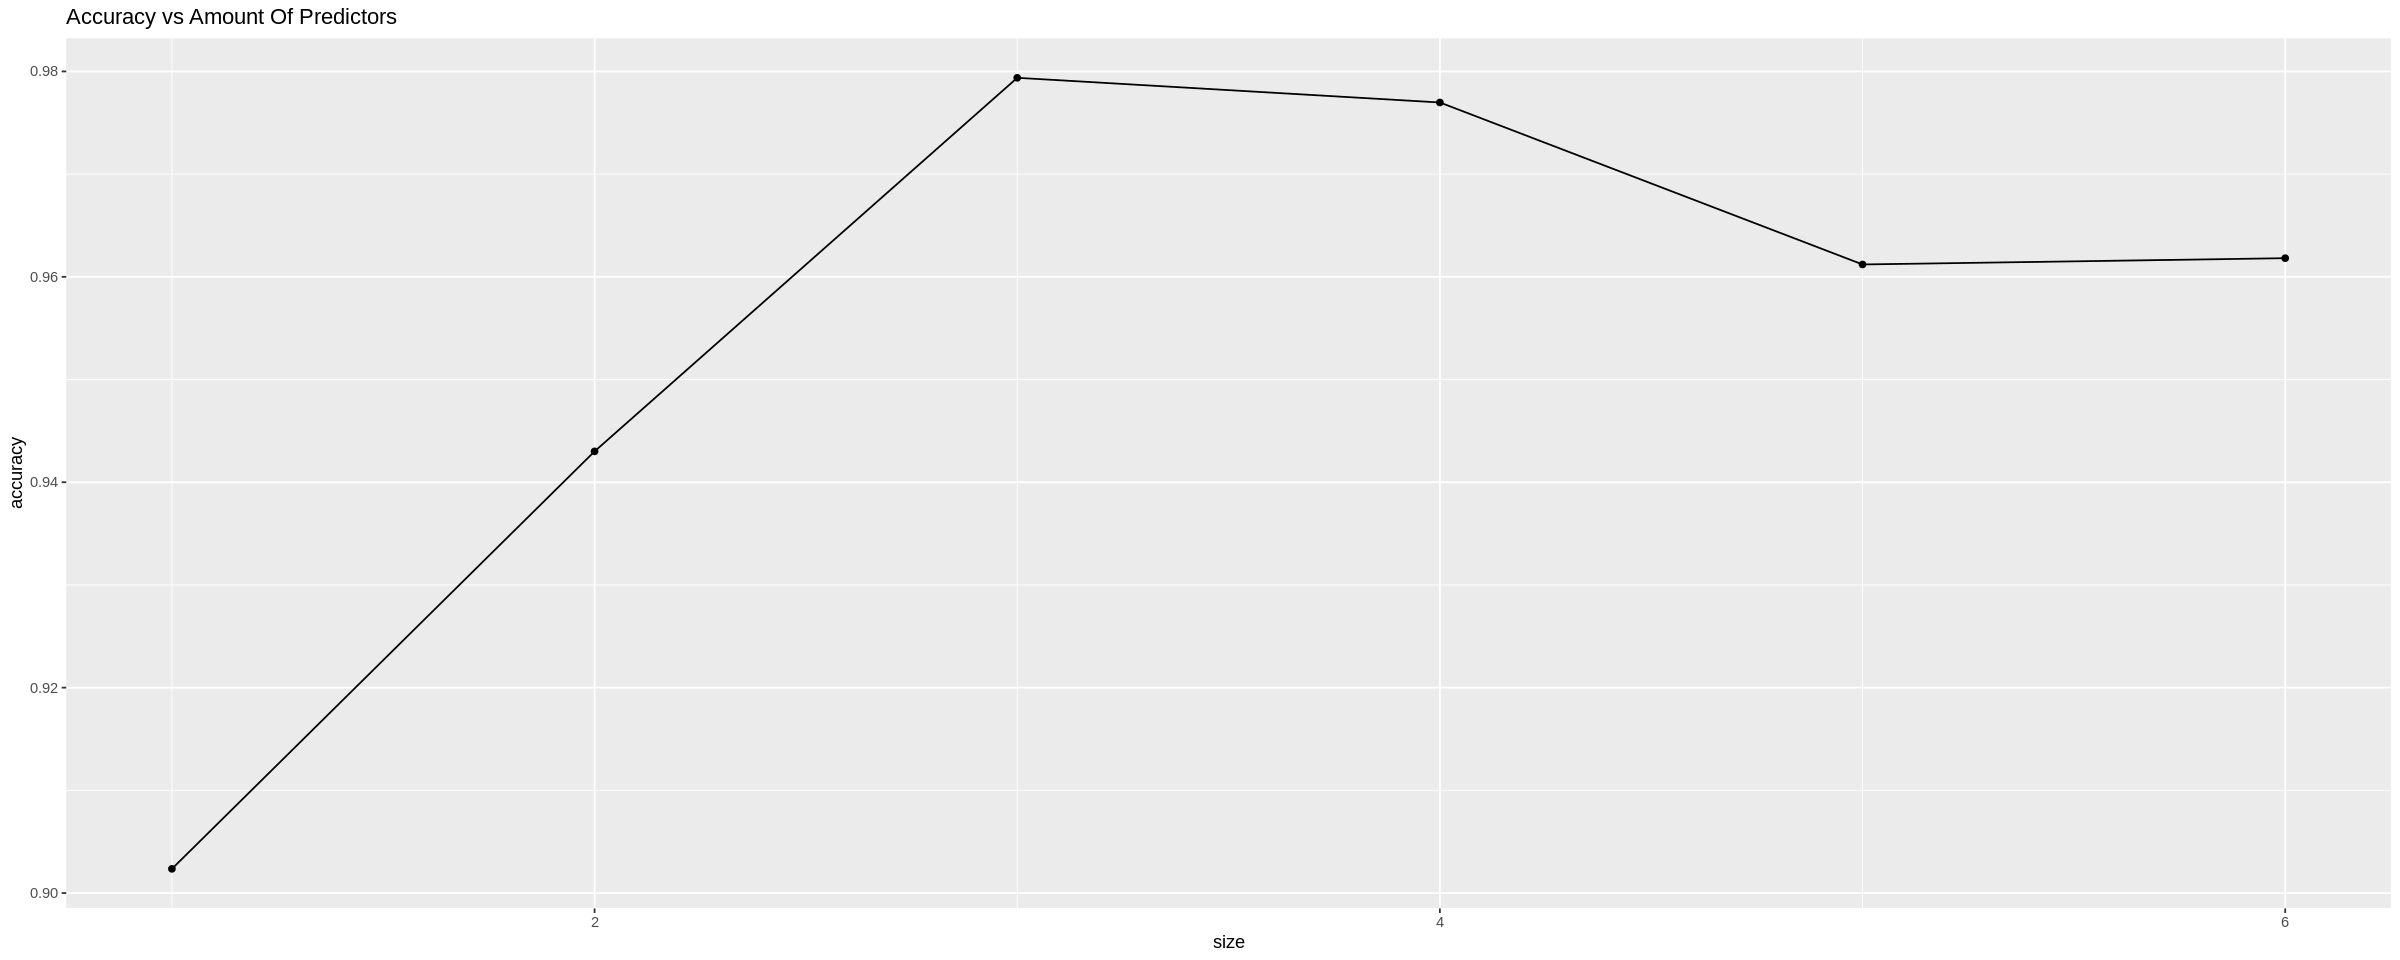

In [13]:
#visualizing which group of predictors gives the highest accuracy  
graph<-accuracies|>
    ggplot(aes(x=size,y=accuracy))+
    geom_line()+
    geom_point()+
    ggtitle("Accuracy vs Amount Of Predictors")
graph

**Figure #7:** Line graph showing the suspected accuracies of different amounts of predictors

**Note:** These accuracies may not reflect the true accuracy of the classifier thus further testing will be done using trial and error on each predictor subset to determine the true accuracy.

> ## Performing the Analysis
Code cell below does 6 things:                   
> 1. Creates and tunes the model
> 2. Performs cross validation using 10 folds which give a good estimate of the potential accuracy of the classifier
> 3. After trial and error, creates the recipe using the predictor combination that give the true highest accuracy which is row 4 in Table #4
> 4. Creates a table containing 10 k values ranging from 1 to 10 which is a range that, sufficient, for this dataset, due to the fact that as the number of neighbors increase, the accuracy decreases.
> 5. Fits the model for each value of k
> 6. Plots the accuracy of each k value

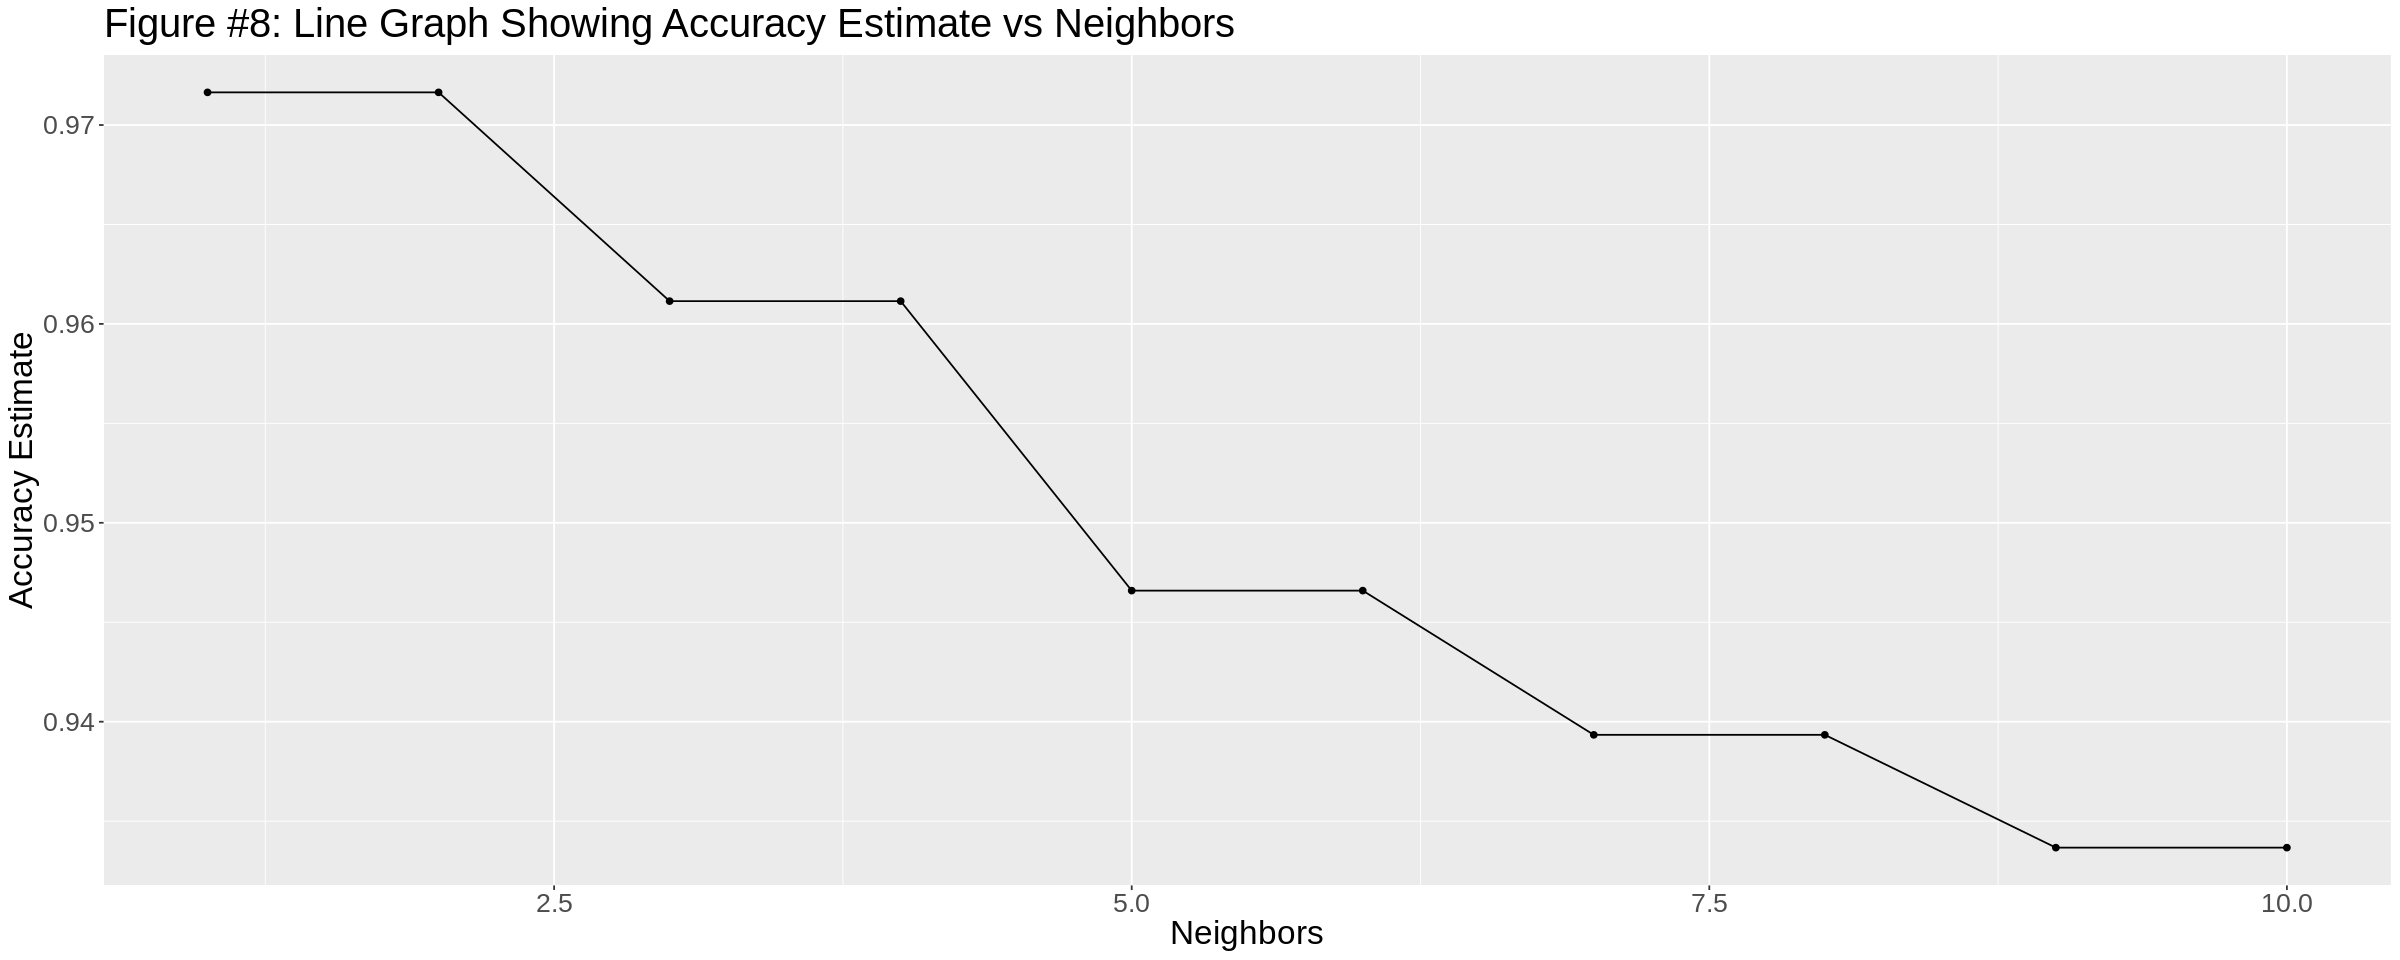

In [14]:
#tuning the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

#performing cross validation; 10 folds are used to get a good estimate of the potential accuracy of our classifier
life_vfold <- vfold_cv(life_expectancy_train, v = 10, strata = Status)

#creating the recipe and scaling and centring the predictors 
life_recipe <- recipe(Status ~  Income.composition.of.resources+thinness.5.to.19.years+Life.expectancy+Schooling, 
                                data = life_expectancy_train) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

#creating a table of k values; 10 values of k ranging from 1 to 10 was chosen because
# 1. to increase performance
# 2. for this particular dataset, as the number of neighbors increase, the accuracy decreases
k_vals <- tibble(neighbors = seq(from = 1, to = 10))

#fitting the model for each value of k
knn_results <- workflow() |>
  add_recipe(life_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples =life_vfold, grid = k_vals) |>
  collect_metrics() 

#filtering the results table for accuracy values only
accuracies <- knn_results |>
  filter(.metric == "accuracy")

#plotting the graph of the neighbors and their resulting accuracies/mean
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  ggtitle("Figure #8: Line Graph Showing Accuracy Estimate vs Neighbors")+
  theme(text = element_text(size = 20))
accuracy_vs_k

Figure 8 shows that their are two values of k that produces the highest accuracy, that is, k=1 and k=2. k=2 will be chosen to avoid overfitting where the model is influenced too much by the data.

> Code cell bellow does 3 things:
> 1. Creates the model with most optimal value of k
> 2. Fits this model onto the training set
> 3. Predict the status of the countries in the testing set
> 4. Determines the accuracy of the classifier

In [15]:
#creating the model with the best value of k
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors =2) |>
  set_engine("kknn") |>
  set_mode("classification")

#fitting the model to the training dataset
knn_fit <- workflow() |>
  add_recipe(life_recipe) |>
  add_model(knn_spec) |>
  fit(data = life_expectancy_train)

#allowing the model to predict each observation's classes in the testing dataset
life_test_predictions <- predict(knn_fit, life_expectancy_test) |>
  bind_cols(life_expectancy_test)

#determining the accuracy of our model
life_test_predictions |>
  metrics(truth = Status, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9878935


**Table #5:** Above table showing the accuracy of the model 

> Code cell below produces the confusion matrix by comparing the classifier's predicted status and the true status.

In [16]:
#generating the confusion matrix
confusion <- life_test_predictions |>
             conf_mat(truth = Status, estimate = .pred_class)
confusion

            Truth
Prediction   Developing Developed
  Developing        350         3
  Developed           2        58

**Matrix #1:**  Above confusion matrix showing the number of observations the model guessed correctly and incorrectly

## Methods: ## 

The data analysis will be done through a varying process of graphs, from which we can infer the trends we hope to see. We are using 6 variables: life expectancy, percentage expenditure, GDP, schooling, income composition of resources and, percentage thinness, to predict the status of the country. These variables were chosen based on information from the internet and the use of graphical displays we created within R. More developed countries often have more resources to invest in health care and will increase the Life expectancy. We chose percentage expenditure as a variable as well, because it is the percentage of GDP dedicated towards income. Another good indicator for the status is the GDP per capita for the country; therefore, we must take population into account. The status can also be predicted by the quality of the schooling system and how much education is pushed. We define this by the average number of years of education for people in that country. Financial stability is often connected to a more developed country, so we used income composition of resources. This is the relative share of income divided by the total income of the area. Finally, we considered the overall health care and the percentage of thinness, which gauges the prevalence of thinness in the country (the percentage of people with a very low BMI). These variables showed correlation with the status of the country and thus will be adequate predictors. The results will be represented in a scatterplot of the predicted statuses of the countries with each of the predictor variables.

## Expected outcomes and significance: ##

From this data set, we intend to find whether or not a country can be classified as a developing country or a developed country. From our analyses, we hope to find a few of the major and minor factors in determining the status of a country(eg. Life Expectancy, income, etc.). We expect that some of the major determining factors include life expectancy, adult mortality, infant deaths, and GDP. With these findings, we hope to learn about what forms the pillars of a society, what makes a country strong, and what can make it fall apart. This study could also lead us to exploring the question of what must be done within a country for it to sustain itself.

